### Code-1.1: Open VTK


Version: 2020-05-25

Tasks:
    1. Open VTK

Purpose:
    1. Development 

Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pylab as plt 
from matplotlib import cm

import os
import math
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

from IPython.display import clear_output
from time import time, gmtime, strftime, localtime

import warnings
warnings.filterwarnings("ignore")

### 1. Open VTK

In [7]:
# Get vtk from data folder
datadir = os.path.join(os.getcwd(), "samples")
datadir

'/home/lestandi/Documents/IHPC/surrogate/samples'

In [8]:
# time
t = 1

# load a vtk file as input
vtkname = "partScaleThermalFrame-%d.vtk" %t
vtkpath = os.path.join(datadir, vtkname)
f = open(vtkpath, "r")
if f:
    contents = f.read()
    f.close()
lines = contents.split('\n')

In [9]:
print (contents)

# vtk DataFile Version 4.2
vtk output
ASCII
DATASET UNSTRUCTURED_GRID
FIELD FieldData 5
SCALE_RATIO 1 1 double
0.001 
NELE_DIM 3 1 int
20 5 5 
DLEN_DIM 3 1 double
0.00099999997765 0.00099999997765 0.0002000000095 
ORIGIN 3 1 double
0 0 0 
TIME 1 1 double
4.5375632454 
POINTS 756 float
0 0 0 0.001 0 0 0.002 0 0 
0.003 0 0 0.004 0 0 0.005 0 0 
0.006 0 0 0.007 0 0 0.008 0 0 
0.009 0 0 0.01 0 0 0.011 0 0 
0.012 0 0 0.013 0 0 0.014 0 0 
0.015 0 0 0.016 0 0 0.017 0 0 
0.018 0 0 0.019 0 0 0.02 0 0 
0 0.001 0 0.001 0.001 0 0.002 0.001 0 
0.003 0.001 0 0.004 0.001 0 0.005 0.001 0 
0.006 0.001 0 0.007 0.001 0 0.008 0.001 0 
0.009 0.001 0 0.01 0.001 0 0.011 0.001 0 
0.012 0.001 0 0.013 0.001 0 0.014 0.001 0 
0.015 0.001 0 0.016 0.001 0 0.017 0.001 0 
0.018 0.001 0 0.019 0.001 0 0.02 0.001 0 
0 0.002 0 0.001 0.002 0 0.002 0.002 0 
0.003 0.002 0 0.004 0.002 0 0.005 0.002 0 
0.006 0.002 0 0.007 0.002 0 0.008 0.002 0 
0.009 0.002 0 0.01 0.002 0 0.011 0.002 0 
0.012 0.002 0 0.013 0.002 0 0.014 0.002 0

In [10]:
l_tp = [i for i in range(len(lines)) if 'Kelvin' in lines[i]][0]
l_pt = [i for i in range(len(lines)) if 'POINTS' in lines[i]][0]
n_pt = int(lines[l_pt].split(" ")[1])
# number of points
print ('Number of data points: %d'%n_pt) 

Number of data points: 756


Extract pt data

In [11]:
# Extract pt data
pt = np.empty([0, 3])
i, c = 1, 0
while c < n_pt:
    pt_i = np.array(lines[l_pt + i].split(' ')[:-1], dtype=float).reshape(-1, 3)
    pt = np.vstack([pt, pt_i])
    i += 1
    c += pt_i.shape[0]
# pt data
pt

array([[0.   , 0.   , 0.   ],
       [0.001, 0.   , 0.   ],
       [0.002, 0.   , 0.   ],
       ...,
       [0.018, 0.005, 0.001],
       [0.019, 0.005, 0.001],
       [0.02 , 0.005, 0.001]])

In [12]:
# Extract temperature data
tp = np.empty([0, 1])
i, c = 1, 0
while c < n_pt:
    tp_i = np.array(lines[l_tp + i].split(' ')[:-1], dtype=float).reshape(-1, 1)
    tp = np.vstack([tp, tp_i])
    i += 1
    c += tp_i.shape[0]
# pt data
tp.shape

(756, 1)

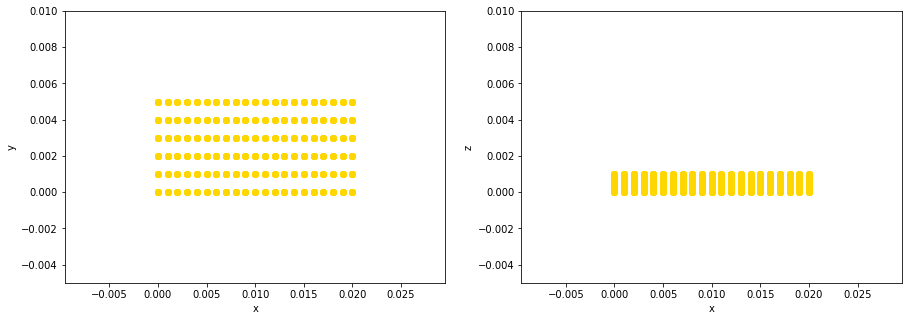

In [13]:
# 2d plot (grid)
x, y, z = pt[:, 0], pt[:, 1], pt[:, 2]

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
plt.scatter(x, y, c='gold', s=35, alpha=.85); plt.xlabel('x'); plt.ylabel('y'); plt.ylim(-.005, .01);
ax = fig.add_subplot(1, 2, 2)
plt.scatter(x, z, c='gold', s=35, alpha=.85); plt.xlabel('x'); plt.ylabel('z'); plt.ylim(-.005, .01);

In [14]:
# 3d plot (temperature)
fig = plt.figure(figsize=(20, 5))
ax = plt.axes(projection='3d', aspect='equal')
p = ax.scatter3D(x, y, z, c=tp.flatten(), marker='o', s=850, alpha=.85,
                 norm=colors.LogNorm(vmin=250, vmax=25000), cmap='rainbow');
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');
ax.xaxis.pane.fill, ax.yaxis.paz*ne.fill, ax.zaxis.pane.fill = False, False, False
ax.view_init(35, -75); fig.colorbar(p, fraction=.01); ax.grid(b=None); plt.title(vtkname.split('.')[0], fontsize='x-large');
#plt.savefig(vtkname.split('.')[0], bbox_inches='tight')

SyntaxError: can't assign to operator (<ipython-input-14-066421feef68>, line 7)